In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from scipy.fft import fft2, ifft2, fftfreq, fftshift, ifftshift

In [2]:
ρa = 5                             # Radio de la abertura adimensional r_a/λ
lim = 10
N = 1000
x = np.linspace(-lim, lim, N)   # Distancia radial adimensional r/λ
Δx = x[1]-x[0]
y = np.linspace(-lim, lim, N)
Δy = y[1]-y[0]
#ζ1 = np.linspace(0.01, 0.5, 200)
#ζ2 = np.linspace(0.5, 1, 100)
ζ = np.linspace(0.01, 0.02, 100)
#ζ = np.concatenate([ζ1,ζ2,ζ3])     # Distancia de propagación adimensional z/r_a
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2+Y**2)
U0 = 1-(R<ρa)

In [3]:
fftU = fft2(U0)
fx = fftfreq(N, Δx)
fy = fftfreq(N, Δy)
Fx, Fy = np.meshgrid(fx, fy)
Ρ = np.sqrt(Fx**2+Fy**2)
Hf = []
for z in ζ:
    Hf.append(np.exp(-1j*np.pi*ρa*z*Ρ**2))
U = []
for i in range(len(ζ)):
    U.append(fftshift(ifft2(U0*Hf[i])))
U = np.array(U)
U = np.transpose(U[:,500,:])

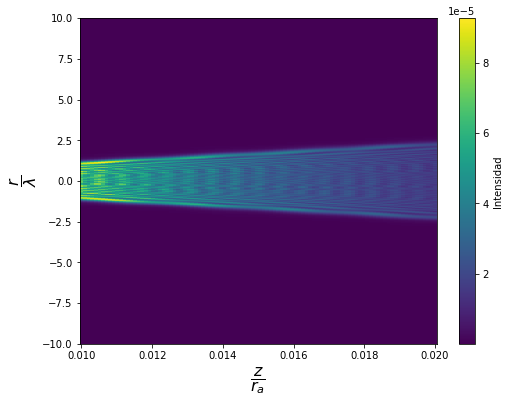

In [4]:
fig, ax0 = plt.subplots(figsize=(8,6))
im = ax0.pcolormesh(ζ, x, abs(U)**2, shading='auto')
fig.colorbar(im, ax=ax0, label='Intensidad')
plt.xlabel(r'$\dfrac{z}{r_{a}}$', fontsize=16)
plt.ylabel(r'$\dfrac{r}{\lambda}$', fontsize=16)
plt.show()

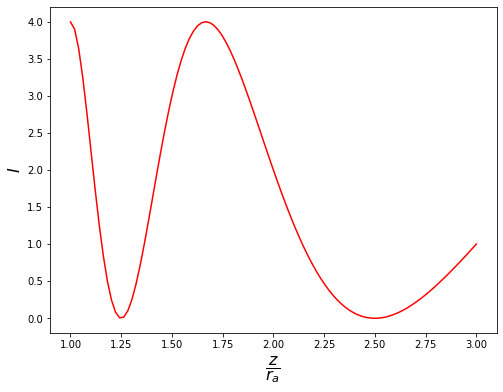

In [5]:
plt.figure(figsize=(8,6))
plt.plot(ζ, I[:,500], color='red')
plt.xlabel(r'$\dfrac{z}{r_{a}}$', fontsize=16)
plt.ylabel(r'$I$', fontsize=16)
plt.show()

IndexError: index 242 is out of bounds for axis 0 with size 100

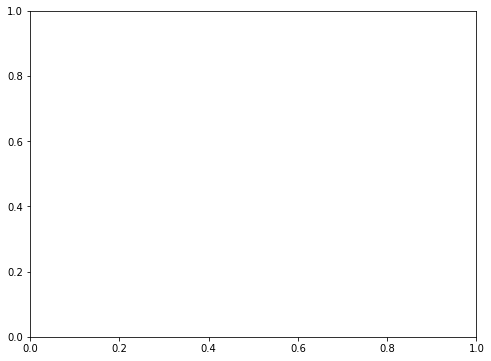

In [6]:
fig, ax1 = plt.subplots(figsize=(8,6))
z = []
for a, b in [(2,242), (14/3,266), (42/5,300), (14,312), (70/3,333), (42,374), (0,225)]:
    norm = cm.colors.Normalize(vmin=a, vmax=a+np.max(I))
    im = ax1.scatter(ρ, a+I[b,:], c=a+I[b,:], norm=norm, marker='.', s=1)
    z.append(a)
fig.colorbar(im, ax=ax1, label='Intensidad')
ax1.set_facecolor('dimgrey')
plt.xlabel(r'$\dfrac{r}{\lambda}$', fontsize=16)
plt.ylabel(r'$\dfrac{z}{r_{a}}$', fontsize=16)
plt.yticks(z, labels=[r'$5/7$',r'$5/6$',r'$5/5$',r'$5/4$',r'$5/3$',r'$5/2$',r'$5/8$'])
plt.show()

In [7]:
lim = 300
ρ = np.linspace(-lim, lim, 1000)   # Distancia radial adimensional r/λ
ζ = np.linspace(200, 225, 100)     # Distancia de propagación adimensional z/r_a     
R, Z = np.meshgrid(ρ, ζ)

In [8]:
I = []
for z in ζ:
    f = lambda s: s*np.exp(1j*np.pi*s**2)*sc.jv(0,2*np.pi*np.sqrt(1/(ρa*z))*ρ*s)   # Integrando
    Uf, err = quad_vec(f, 0, np.sqrt(ρa/z))                                        # Realización de la integral
    If = 4*np.pi**2*abs(Uf)**2                                                     # Intensidad de Fresnel
    I.append(If)
I = np.array(I)

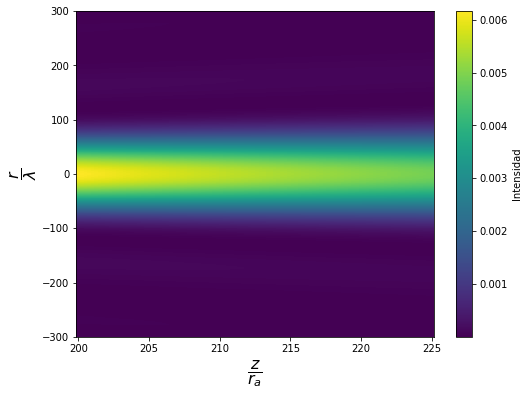

In [9]:
fig, ax0 = plt.subplots(figsize=(8,6))
im = ax0.pcolormesh(Z, R, I, shading='auto')
fig.colorbar(im, ax=ax0, label='Intensidad')
plt.xlabel(r'$\dfrac{z}{r_{a}}$', fontsize=16)
plt.ylabel(r'$\dfrac{r}{\lambda}$', fontsize=16)
plt.show()

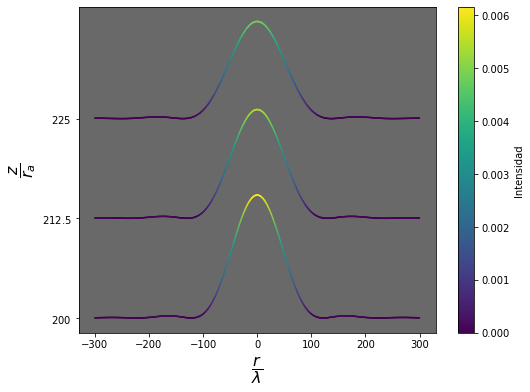

In [10]:
fig, ax1 = plt.subplots(figsize=(8,6))
z = []
for a, b in [(0.005,50), (0.01,99), (0,0)]:
    norm = cm.colors.Normalize(vmin=a, vmax=a+np.max(I))
    im = ax1.scatter(ρ, a+I[b,:], c=a+I[b,:], norm=norm, marker='.', s=1)
    z.append(a)
fig.colorbar(im, ax=ax1, label='Intensidad')
ax1.set_facecolor('dimgrey')
plt.xlabel(r'$\dfrac{r}{\lambda}$', fontsize=16)
plt.ylabel(r'$\dfrac{z}{r_{a}}$', fontsize=16)
plt.yticks(z, labels=[r'$212.5$',r'$225$',r'$200$'])
plt.show()